In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
# Load the dataset
df = pd.read_csv("C:/Users/ridit/Downloads/all_season_batting_card.csv")

# Display the first few rows of the dataset
df.head()


,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
0,2022,1304047,CSK v KKR,CSK,KKR,"Wankhede Stadium, Mumbai",Mumbai,India,CSK,1,...,0.0,0.0,0.00,False,False,"{'wickets': 1, 'runs': 2}",0.3,c Rana b Yadav,<b> edged and taken at slip! </b> Uncharacteri...,NaN
1,2022,1304047,CSK v KKR,CSK,KKR,"Wankhede Stadium, Mumbai",Mumbai,India,CSK,1,...,0.0,0.0,37.50,False,False,"{'wickets': 2, 'runs': 28}",4.1,c SS Iyer b Yadav,chipped straight to mid-on. Conway's debut isn...,NaN
2,2022,1304047,CSK v KKR,CSK,KKR,"Wankhede Stadium, Mumbai",Mumbai,India,CSK,1,...,2.0,2.0,133.33,False,False,"{'wickets': 3, 'runs': 49}",7.5,st &dagger;Jackson b Varun,<strong>lightning quick work from Jackson and ...,NaN
3,2022,1304047,CSK v KKR,CSK,KKR,"Wankhede Stadium, Mumbai",Mumbai,India,CSK,1,...,1.0,1.0,88.23,False,False,"{'wickets': 4, 'runs': 52}",8.4,run out (SS Iyer/Narine),what is happening! <strong>Rayudu left high an...,NaN
4,2022,1304047,CSK v KKR,CSK,KKR,"Wankhede Stadium, Mumbai",Mumbai,India,CSK,1,...,0.0,1.0,92.85,True,True,{},NaN,not out,NaN,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14539 entries, 0 to 14538
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           14539 non-null  int64  
 1   match_id         14539 non-null  int64  
 2   match_name       14539 non-null  object 
 3   home_team        14539 non-null  object 
 4   away_team        14539 non-null  object 
 5   venue            14539 non-null  object 
 6   city             14539 non-null  object 
 7   country          14539 non-null  object 
 8   current_innings  14539 non-null  object 
 9   innings_id       14539 non-null  int64  
 10  name             14539 non-null  object 
 11  fullName         14539 non-null  object 
 12  runs             14533 non-null  float64
 13  ballsFaced       14533 non-null  float64
 14  minutes          14533 non-null  object 
 15  fours            14533 non-null  float64
 16  sixes            14533 non-null  float64
 17  strikeRate  

<AxesSubplot:>

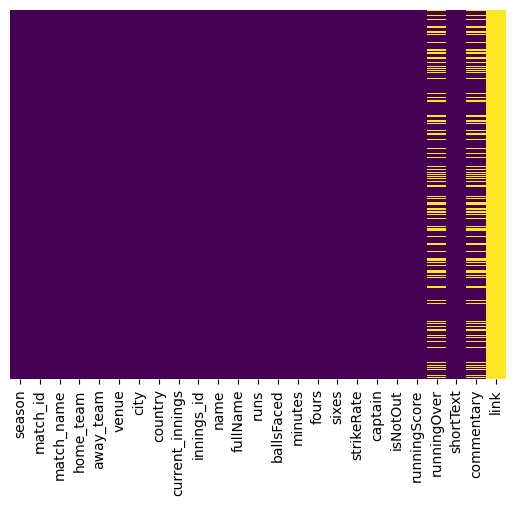

In [47]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
df.drop("commentary",axis=1,inplace=True)
df.drop("link",axis=1,inplace=True)

In [49]:
df['runningOver'].fillna(int(df['runningOver'].mean()),inplace=True)

<AxesSubplot:>

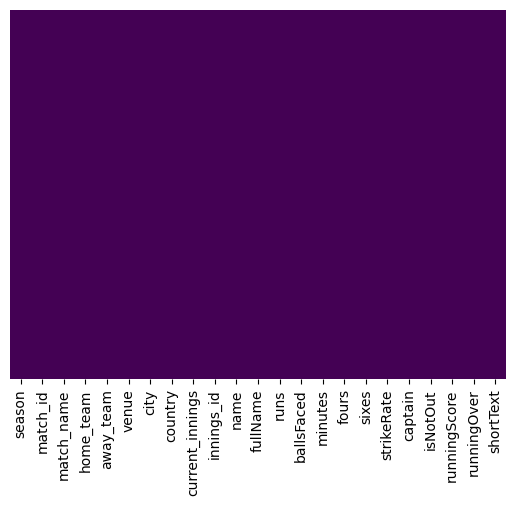

In [50]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [51]:
cnt = 0
visited = []
for i in range(0, len(df['runs'])):
    
    if df['runs'][i] not in visited: 
        
        visited.append(df['runs'][i])
          
        cnt += 1
  
print("No.of.unique values :",
      cnt)
  
print("unique values :",
      visited)

No.of.unique values : 136
unique values : [0.0, 3.0, 28.0, 15.0, 26.0, 50.0, 44.0, 16.0, 21.0, 20.0, 25.0, 41.0, 81.0, 8.0, 22.0, 12.0, 7.0, 38.0, 1.0, 48.0, 88.0, 32.0, 43.0, 19.0, 24.0, 10.0, 6.0, 55.0, 54.0, 30.0, 4.0, 33.0, 40.0, 35.0, 2.0, 9.0, 57.0, 13.0, 14.0, 18.0, 5.0, 27.0, 49.0, 17.0, 61.0, 31.0, 11.0, 70.0, 100.0, 84.0, 60.0, 23.0, 68.0, 51.0, 34.0, 37.0, 42.0, 29.0, 45.0, 52.0, 56.0, 39.0, 36.0, 80.0, 64.0, 96.0, 75.0, 66.0, 59.0, 95.0, 87.0, 71.0, 103.0, 73.0, 46.0, 94.0, 58.0, 85.0, 116.0, 67.0, 47.0, 78.0, 65.0, 77.0, 99.0, 62.0, 92.0, 63.0, 89.0, 53.0, 76.0, 140.0, 93.0, 112.0, 79.0, 106.0, 86.0, 82.0, 69.0, 98.0, 101.0, 74.0, 124.0, 72.0, 91.0, 119.0, 132.0, 83.0, 97.0, 90.0, 107.0, nan, 102.0, 114.0, 105.0, 104.0, 128.0, 117.0, 126.0, 108.0, 109.0, 129.0, 113.0, 133.0, nan, 122.0, 115.0, 175.0, nan, 120.0, nan, 127.0, 110.0, nan, nan, 158.0]


In [52]:
df['runs'].isna().sum()
np.where(df['runs'].isnull() == True)[0]


array([ 3038,  7642,  9490, 11942, 12985, 13068], dtype=int64)

In [53]:
df['ballsFaced'].isna().sum()
np.where(df['ballsFaced'].isnull() == True)[0]

array([ 3038,  7642,  9490, 11942, 12985, 13068], dtype=int64)

In [54]:
df['fours'].isna().sum()
np.where(df['fours'].isnull() == True)[0]


array([ 3038,  7642,  9490, 11942, 12985, 13068], dtype=int64)

In [55]:
df['sixes'].isna().sum()
np.where(df['sixes'].isnull() == True)[0]

array([ 3038,  7642,  9490, 11942, 12985, 13068], dtype=int64)

In [56]:
df['strikeRate'].isna().sum()
np.where(df['strikeRate'].isnull() == True)[0]

array([ 3038,  7642,  9490, 11942, 12985, 13068], dtype=int64)

In [57]:
df.drop([3038,  7642,  9490, 11942, 12985, 13068],axis=0,inplace=True)


In [58]:
df['minutes'].isna().sum()
np.where(df['minutes'].isnull() == True)[0]

array([], dtype=int64)

In [59]:
df["captain"] = df["captain"].astype(int)

In [60]:
df["isNotOut"] = df["isNotOut"].astype(int)

In [61]:
df.dtypes

season               int64
match_id             int64
match_name          object
home_team           object
away_team           object
venue               object
city                object
country             object
current_innings     object
innings_id           int64
name                object
fullName            object
runs               float64
ballsFaced         float64
minutes             object
fours              float64
sixes              float64
strikeRate          object
captain              int32
isNotOut             int32
runningScore        object
runningOver        float64
shortText           object
dtype: object

In [62]:
df = df.replace(['-'], 0)


In [63]:
df['runs'] = df['runs'].astype(int)


In [64]:
df['ballsFaced'] = df['ballsFaced'].astype(int)


In [65]:
df['fours'] = df['fours'].astype(int)


In [66]:
df['sixes'] = df['sixes'].astype(int)
df['strikeRate'] = df['strikeRate'].astype(float)
df['minutes'] = df['minutes'].astype(float)


In [67]:
df1=df[['runs','ballsFaced']]

In [68]:
df.dtypes

season               int64
match_id             int64
match_name          object
home_team           object
away_team           object
venue               object
city                object
country             object
current_innings     object
innings_id           int64
name                object
fullName            object
runs                 int32
ballsFaced           int32
minutes            float64
fours                int32
sixes                int32
strikeRate         float64
captain              int32
isNotOut             int32
runningScore        object
runningOver        float64
shortText           object
dtype: object

In [69]:
# df['strikeRate'].isna().sum()
# np.where(df['strikeRate'].isnull() == True)[0]

In [70]:
from scipy.stats import pearsonr
corr1,_=pearsonr(df['runs'],df['ballsFaced'])
corr2,_=pearsonr(df['runs'],df['fours'])
corr3,_=pearsonr(df['runs'],df['sixes'])
corr4,_=pearsonr(df['runs'],df['strikeRate'])
corr5,_=pearsonr(df['runs'],df['minutes'])
corr6,_=pearsonr(df['runs'],df['captain'])
corr7,_=pearsonr(df['runs'],df['isNotOut'])
corr8,_=pearsonr(df['runs'],df['runningOver'])

print(corr1)
print(corr2)
print(corr3)
print(corr4)
print(corr5)
print(corr6)
print(corr7)
print(corr8)

0.9315877805853926
0.8641393500176645
0.757760267146123
0.503465259316379
0.5885765095899526
0.12920257200382604
0.0628862828717322
0.19376809259357786


In [71]:
df['opponentteam'] = np.nan

In [72]:
df.loc[df['current_innings'] == df['away_team'], 'opponentteam'] = df['home_team']
df.loc[df['current_innings'] == df['home_team'], 'opponentteam'] = df['away_team']


In [ ]:
df1.drop(df.columns[[2,3,5,6,7,8,9,10]], axis=1, inplace=True)


In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [78]:
X1 = df[['ballsFaced','fours','sixes']]
y1 = df['runs']

print(X1.shape, y1.shape)

(14533, 3) (14533,)


In [79]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=0)


In [80]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

models = {
    "KNN": KNeighborsRegressor(),
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor()
}

# perform 5-fold cross validation and print mean scores
for name, model in models.items():
    scores = cross_val_score(model, X1_train, y1_train, cv=5)
    print(f"{name}: {np.mean(scores)}")

KNN: 0.9729499038806635
Linear Regression: 0.9806423475142928
Random Forest: 0.9755265630608836


In [81]:
linreg=LinearRegression()
abc=linreg.fit(X1_train,y1_train)
y1_pred=abc.predict(X1_test)
Accuracy1=r2_score(y1_test,y1_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy1)


 Accuracy of the model is 98.19


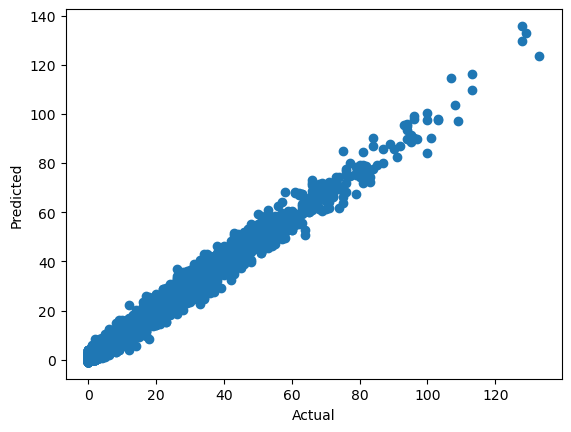

In [82]:
plt.scatter(y1_test,y1_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

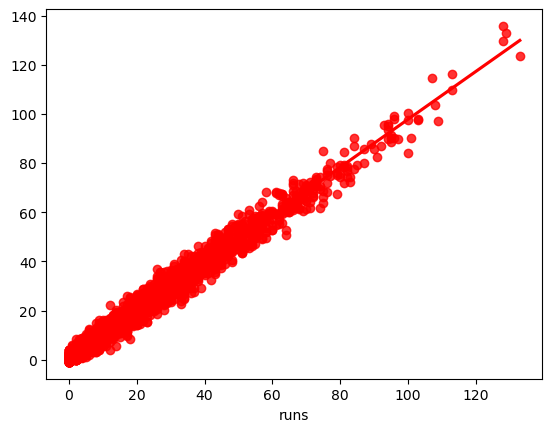

In [86]:
sns.regplot(x=y1_test,y=y1_pred,ci=None,color ='red');


In [87]:
pred_df=pd.DataFrame({'Actual Value':y1_test,'Predicted Value':y1_pred,'Difference':y1_test-y1_pred})


In [88]:
pred_df
# try R-square

,Actual Value,Predicted Value,Difference
9418,23,27.334035,-4.334035
10439,24,19.889432,4.110568
2976,2,1.203597,0.796403
11686,58,53.663744,4.336256
4756,0,0.500590,-0.500590
...,...,...,...
1417,2,1.906605,0.093395
11027,1,1.203597,-0.203597
12635,13,13.267009,-0.267009
5568,8,8.742065,-0.742065


In [89]:
df1=df['strikeRate']

In [90]:
df.dtypes

season               int64
match_id             int64
match_name          object
home_team           object
away_team           object
venue               object
city                object
country             object
current_innings     object
innings_id           int64
name                object
fullName            object
runs                 int32
ballsFaced           int32
minutes            float64
fours                int32
sixes                int32
strikeRate         float64
captain              int32
isNotOut             int32
runningScore        object
runningOver        float64
shortText           object
opponentteam        object
dtype: object

In [91]:
df['strikeRate'] = df['strikeRate'].astype(float)
df['minutes'] = df['minutes'].astype(float)

In [39]:
# Continue with the same pipeline
# based on correlation coefficient, we have found runs scored by a batsman is highly correlated with 1,2,3 and 4. 
# Hence, we are using these columns to fit a multi-variate linear regression model to predict runs scored by batsman ABD during P vs Q match.
# runs_scored will be target variable
# balls, fours, sixes will be dependent variables. 
# 98% accuracy we will get
# What will we ask from user? We will ask who is P and Q in P vs Q match.
# What will we provide? Our model will provide list of runs could be scored by a batsman in P team. 

In [40]:
# Second approach
# What will you ask from the user? When did the batsman enter the field, did he open or how many balls in game did he enter.
# What will we provide? Assuming the batsman will face half the remaining balls, we will provide the runs scored by him in remaining balls.
# Our target variable will still be run.
# But our dependent variables will be ballsRemaining and ballsFaced
# please confirm whether can we used some processed data for testing purposes (Last 10 match strikerate instead of present match strikerate)

In [93]:
run=0
import math

def abc(balls,teamname,batsmanname):
    df1=df.loc[(df['fullName'] == batsmanname) & (df['away_team'] == teamname) ]
    X1 = df1[['ballsFaced']]
    y1 = df1['runs']
    X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.1,random_state=0)
    linreg=LinearRegression()
    abc=linreg.fit(X1_train,y1_train)
    y1_pred=abc.predict(X1_test)
    Accuracy1=r2_score(y1_test,y1_pred)*100
    if(math.isnan (Accuracy1)):
        print("cant say ")
    else:
        print(" Accuracy of the model is %.2f" %Accuracy1)

    y2_pred=abc.predict([[balls]])
    print(y2_pred)
    

    

In [94]:
abc(25,"KKR","Ruturaj Gaikwad")

cant say 
[30.25402108]


In [44]:
df.to_csv('C:\project work\sbatting2.csv', index=False)

In [95]:
df=df.drop(['match_name','venue','city','country','innings_id','name','minutes','captain','isNotOut','runningScore','runningOver','shortText'], axis=1)


In [96]:
df=df.drop(['home_team','away_team','current_innings'], axis=1)


In [97]:
df

,season,match_id,fullName,runs,ballsFaced,fours,sixes,strikeRate,opponentteam
0,2022,1304047,Ruturaj Gaikwad,0,4,0,0,0.00,KKR
1,2022,1304047,Devon Conway,3,8,0,0,37.50,KKR
2,2022,1304047,Robin Uthappa,28,21,2,2,133.33,KKR
3,2022,1304047,Ambati Rayudu,15,17,1,1,88.23,KKR
4,2022,1304047,Ravindra Jadeja,26,28,0,1,92.85,KKR
...,...,...,...,...,...,...,...,...,...
14534,2008,336040,Yusuf Pathan,56,39,3,4,143.58,CSK
14535,2008,336040,Mohammad Kaif,12,9,0,1,133.33,CSK
14536,2008,336040,Ravindra Jadeja,0,1,0,0,0.00,CSK
14537,2008,336040,Shane Warne,9,9,1,0,100.00,CSK


In [100]:
import pickle

with open('C:/project work/batpkl.pkl', 'wb') as f:
    pickle.dump(linreg, f)